# Estudo de filiados dos partidos

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
plt.ion()

Liberando conexão com google Drive.

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Compartilhei um diretório no Google Drive com os arquivos de MG: https://drive.google.com/open?id=1KhhvWnAxNI1omxnNv_QqbV_vPxuFf13H

#### Pega a lista de arquivos no Drive

In [0]:
#    Auto-iterate usando a sintaxe de consulta
#    https://developers.google.com/drive/v2/web/search-parameters
arquivos = drive.ListFile(
    {'q': "'1KhhvWnAxNI1omxnNv_QqbV_vPxuFf13H' in parents"}).GetList()

#### Armazenar os dados em um diretório local (colab) 

In [0]:
import os
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

### Concatenar dataframes
#### Merge, join, and concatenate
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Baixa os arquivos CSV para o diretório local do colab e estrutura o dataframe

In [0]:
frames = []
for arquivo in arquivos:
  #  Criação & download por id.
  print('Nome do arquivo : %s, id: %s' % (arquivo['title'], arquivo['id']))
  fname = os.path.join(local_download_path, arquivo['title'])
  print('Salvo em {}'.format(fname))
  arquivo_ = drive.CreateFile({'id': arquivo['id']})
  arquivo_.GetContentFile(fname)
  filiados_mg = pd.read_csv(fname,sep=';', encoding='latin-1')
  frames.append(filiados_mg)

base = pd.concat(frames)

Nome do arquivo : filiados_psol_mg.csv, id: 1XNSUwBfuIM5A_ar2DtSVMI3Gs4dAARRU
Salvo em /root/data/filiados_psol_mg.csv
Nome do arquivo : filiados_solidariedade_mg.csv, id: 1FWJ2CdhdIeSynsw3vpUFhM_c0LZAqPwr
Salvo em /root/data/filiados_solidariedade_mg.csv
Nome do arquivo : filiados_pv_mg.csv, id: 1o-1VIQtGIKeRPOBunR4ZV5j2Y2Zbpv0g
Salvo em /root/data/filiados_pv_mg.csv
Nome do arquivo : filiados_ptc_mg.csv, id: 13mkWess1eyn5M28GLmc-KF4QpIZpyflh
Salvo em /root/data/filiados_ptc_mg.csv
Nome do arquivo : filiados_ptb_mg.csv, id: 1rj-kuSLQJJgWsM6ZgnAKsuaeJd8VIIlg
Salvo em /root/data/filiados_ptb_mg.csv
Nome do arquivo : filiados_pt_mg.csv, id: 12aGQyx1A4bMArcWc56O-ESrzi_TOOauy
Salvo em /root/data/filiados_pt_mg.csv
Nome do arquivo : filiados_psl_mg.csv, id: 1sT6G3T5gIzqFA8S9OTKIYYWjnp1U4x6U
Salvo em /root/data/filiados_psl_mg.csv
Nome do arquivo : filiados_psdb_mg.csv, id: 1CxmdHpwNnPJDwn6cA6cifroLSLty7eAn
Salvo em /root/data/filiados_psdb_mg.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Nome do arquivo : filiados_psd_mg.csv, id: 1YcBA0UnZtICeKir5DC0p8C2bz1Yi8qkf
Salvo em /root/data/filiados_psd_mg.csv
Nome do arquivo : filiados_psc_mg.csv, id: 1OiteWjVWZYDMA9EtxKOKYUU0xvXZcpBx
Salvo em /root/data/filiados_psc_mg.csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Nome do arquivo : filiados_psb_mg.csv, id: 1PTjEBe0Lk_GOyRUiHQ9g93CzVhPRa0zI
Salvo em /root/data/filiados_psb_mg.csv
Nome do arquivo : filiados_prtb_mg.csv, id: 1E7ZoOrcgSICNUTu5zLjJ19a_a6Zf70IC
Salvo em /root/data/filiados_prtb_mg.csv
Nome do arquivo : filiados_prp_mg.csv, id: 1ZenwKgTL7Hr0A50uHLk3ZNauwfxvWmeK
Salvo em /root/data/filiados_prp_mg.csv
Nome do arquivo : filiados_pros_mg.csv, id: 1GCr9ncX52atR8btzrLJndCkiX49EBb--
Salvo em /root/data/filiados_pros_mg.csv
Nome do arquivo : filiados_prb_mg.csv, id: 1Quk4vbzOBjl5GFo9WWl26MSacurTL4s_
Salvo em /root/data/filiados_prb_mg.csv
Nome do arquivo : filiados_pps_mg.csv, id: 1-bie1M7emtrbEezmyTPlrkUXtSq9dgiF
Salvo em /root/data/filiados_pps_mg.csv
Nome do arquivo : filiados_pp_mg.csv, id: 1NTU49F2_s5gtgtCsJJzbaFw4V9FyDkRl
Salvo em /root/data/filiados_pp_mg.csv
Nome do arquivo : filiados_pode_mg.csv, id: 1zxGv-dfjC5LuwspG0AxS-X8_mKZVgdsw
Salvo em /root/data/filiados_pode_mg.csv
Nome do arquivo : filiados_pmn_mg.csv, id: 1f9jiwTnjeqk3o63P

Visualizar partidos da base

In [0]:
base['SIGLA DO PARTIDO'].unique()

array(['PSOL', 'SOLIDARIEDADE', 'PV', 'PTC', 'PTB', 'PT', 'PSL', 'PSDB',
       'PSD', 'PSC', 'PSB', 'PRTB', 'PRP', 'PROS', 'PRB', 'PPS', 'PP',
       'PODE', 'PMN', 'PL', 'PHS', 'PDT', 'PC DO B', 'PATRI', 'MDB',
       'DEM', 'DC', 'AVANTE', 'PMB', 'PCO', 'PCB', 'PPL', 'NOVO', 'REDE',
       'PSTU'], dtype=object)

In [0]:
base['NOME DO PARTIDO'].unique()

array(['PARTIDO SOCIALISMO E LIBERDADE', 'SOLIDARIEDADE', 'PARTIDO VERDE',
       'PARTIDO TRABALHISTA CRISTÃO', 'PARTIDO TRABALHISTA BRASILEIRO',
       'PARTIDO DOS TRABALHADORES', 'PARTIDO SOCIAL LIBERAL',
       'PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA',
       'PARTIDO SOCIAL DEMOCRÁTICO', 'PARTIDO SOCIAL CRISTÃO',
       'PARTIDO SOCIALISTA BRASILEIRO',
       'PARTIDO RENOVADOR TRABALHISTA BRASILEIRO',
       'PARTIDO REPUBLICANO PROGRESSISTA',
       'PARTIDO REPUBLICANO DA ORDEM SOCIAL',
       'PARTIDO REPUBLICANO BRASILEIRO', 'PARTIDO POPULAR SOCIALISTA',
       'PARTIDO PROGRESSISTA', 'PODEMOS',
       'PARTIDO DA MOBILIZAÇÃO NACIONAL', 'PARTIDO LIBERAL',
       'PARTIDO HUMANISTA DA SOLIDARIEDADE',
       'PARTIDO DEMOCRÁTICO TRABALHISTA', 'PARTIDO COMUNISTA DO BRASIL',
       'Patriota', 'Movimento Democrático Brasileiro', 'DEMOCRATAS',
       'Democracia Cristã', 'AVANTE', 'PARTIDO DA MULHER BRASILEIRA',
       'PARTIDO DA CAUSA OPERÁRIA', 'PARTIDO COMUNISTA BRASILEIRO',

### 2330901 rows × 19 columns

In [0]:
base

# Começando análises

In [0]:
df = pd.DataFrame(base) 


In [0]:
df.head()

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
0,28/09/2019,01:06:04,175537170281,ADRIANO DOS SANTOS CHAVES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,47198,JOAÍMA,149,58,04/03/2007,REGULAR,OFICIAL,15/10/2011,NaN,NaN,NaN,NaN
1,28/09/2019,01:06:04,20195810281,JAIRO DE SOUZA BENTO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,48658,MONTES CLAROS,184,302,14/10/2005,CANCELADO,OFICIAL,13/04/2019,22/02/2008,22/02/2008,NaN,Judicial
2,28/09/2019,01:06:04,94092680213,ANDREIA DA CONCEICAO TOLENTINO E SOUZA,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,53430,SETE LAGOAS,263,285,30/09/2007,CANCELADO,OFICIAL,18/04/2017,10/11/2011,05/10/2011,NaN,A pedido do eleitor
3,28/09/2019,01:06:04,68188370248,IRANI ALVES PEIXOTO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41335,BETIM,319,122,02/01/2006,REGULAR,OFICIAL,13/04/2019,NaN,NaN,NaN,NaN
4,28/09/2019,01:06:04,181601980221,JERDESOM LUIZ PEREIRA APOLINARIO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,48216,MATOZINHOS,174,21,16/04/2009,CANCELADO,OFICIAL,15/10/2016,NaN,09/11/2017,NaN,A pedido do eleitor


###Criar um dataframe (regulares_mg) com os dados dos registros regulares.

In [0]:
filter = df["SITUACAO DO REGISTRO"]=="REGULAR"
regulares_mg = df.where(filter)
regulares_mg

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
0,28/09/2019,01:06:04,175537170281,ADRIANO DOS SANTOS CHAVES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,47198.0,JOAÍMA,149.0,58.0,04/03/2007,REGULAR,OFICIAL,15/10/2011,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28/09/2019,01:06:04,68188370248,IRANI ALVES PEIXOTO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41335.0,BETIM,319.0,122.0,02/01/2006,REGULAR,OFICIAL,13/04/2019,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,28/09/2019,01:06:04,170246130221,WALACE DA SILVA LOPES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,47333.0,JUIZ DE FORA,349.0,335.0,12/01/2006,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN
7,28/09/2019,01:06:04,29673250299,MARLI OLEGARIO DOS SANTOS,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,46256.0,IPATINGA,131.0,3.0,12/01/2006,REGULAR,OFICIAL,15/04/2016,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,28/09/2019,01:06:04,120451170248,MARCIO ROBERTO GONCALVES DE ARAUJO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,50911.0,RIBEIRÃO DAS NEVES,286.0,206.0,09/01/2006,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN


Vamos remover do dataframe regulares_mg as linhas NaN. Estas linhas a serem removidas são correpondentes aos registros onde a coluna "SITUACAO DO REGISTRO" era diferente da string "REGULAR". A função where não expurga as linhas, apenas remove as informações do df. Assim, com a função dropna, o nosso Dataframe terá apenas as linhas dos registros regulares.

In [0]:
regulares_mg = regulares_mg.dropna(axis=0, how='all')
regulares_mg

,DATA DA EXTRACAO,HORA DA EXTRACAO,NUMERO DA INSCRICAO,NOME DO FILIADO,SIGLA DO PARTIDO,NOME DO PARTIDO,UF,CODIGO DO MUNICIPIO,NOME DO MUNICIPIO,ZONA ELEITORAL,SECAO ELEITORAL,DATA DA FILIACAO,SITUACAO DO REGISTRO,TIPO DO REGISTRO,DATA DO PROCESSAMENTO,DATA DA DESFILIACAO,DATA DO CANCELAMENTO,DATA DA REGULARIZACAO,MOTIVO DO CANCELAMENTO
0,28/09/2019,01:06:04,175537170281,ADRIANO DOS SANTOS CHAVES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,47198.0,JOAÍMA,149.0,58.0,04/03/2007,REGULAR,OFICIAL,15/10/2011,NaN,NaN,NaN,NaN
3,28/09/2019,01:06:04,68188370248,IRANI ALVES PEIXOTO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41335.0,BETIM,319.0,122.0,02/01/2006,REGULAR,OFICIAL,13/04/2019,NaN,NaN,NaN,NaN
6,28/09/2019,01:06:04,170246130221,WALACE DA SILVA LOPES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,47333.0,JUIZ DE FORA,349.0,335.0,12/01/2006,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN
7,28/09/2019,01:06:04,29673250299,MARLI OLEGARIO DOS SANTOS,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,46256.0,IPATINGA,131.0,3.0,12/01/2006,REGULAR,OFICIAL,15/04/2016,NaN,NaN,NaN,NaN
9,28/09/2019,01:06:04,120451170248,MARCIO ROBERTO GONCALVES DE ARAUJO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,50911.0,RIBEIRÃO DAS NEVES,286.0,206.0,09/01/2006,REGULAR,OFICIAL,14/04/2018,NaN,NaN,NaN,NaN
11,28/09/2019,01:06:04,66306730264,LUIZ FERNANDO RODRIGUES GOMES,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41238.0,BELO HORIZONTE,30.0,262.0,04/01/2006,REGULAR,OFICIAL,16/10/2018,NaN,NaN,NaN,NaN
12,28/09/2019,01:06:04,153879870248,MARIA APARECIDA ANDRADE SILVA,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,46337.0,ITABIRA,132.0,108.0,02/10/2005,REGULAR,OFICIAL,18/04/2017,NaN,NaN,NaN,NaN
14,28/09/2019,01:06:04,97407350264,FABIO FAIAD BOTTINI,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41238.0,BELO HORIZONTE,26.0,166.0,11/04/2006,REGULAR,OFICIAL,14/10/2017,NaN,NaN,NaN,NaN
15,28/09/2019,01:06:04,13092170604,WILSON JOSE DE OLIVEIRA,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,41238.0,BELO HORIZONTE,26.0,87.0,24/05/2006,REGULAR,OFICIAL,16/10/2018,NaN,NaN,NaN,NaN
16,28/09/2019,01:06:04,121134920205,JAIRO PEREIRA DE CAMARGOS,PSOL,PARTIDO SOCIALISMO E LIBERDADE,MG,49590.0,PATOS DE MINAS,330.0,160.0,04/04/2007,REGULAR,OFICIAL,15/04/2016,NaN,NaN,NaN,NaN


####Agora vamos contar as filiações regulares por partido em MG.

In [0]:
cols = ['NUMERO DA INSCRICAO' , 'SIGLA DO PARTIDO']
simplecount_regulares_mg = pd.DataFrame(regulares_mg[cols].groupby('SIGLA DO PARTIDO').count())
simplecount_regulares_mg


,NUMERO DA INSCRICAO
SIGLA DO PARTIDO,
AVANTE,23138
DC,19713
DEM,143654
MDB,219794
NOVO,4227
PATRI,7439
PC DO B,31602
PCB,361
PCO,708


Vamos investigar se há possíveis erros de base, contando apenas numeros de registro únicos, assim, se os números se manterem, consideraremos que não há registros repetidos para os números de inscrição.

In [0]:
distinct_regulares_mg = pd.DataFrame(regulares_mg[cols].groupby('SIGLA DO PARTIDO')['NUMERO DA INSCRICAO'].nunique())
distinct_regulares_mg

,NUMERO DA INSCRICAO
SIGLA DO PARTIDO,
AVANTE,23128
DC,19713
DEM,143616
MDB,219743
NOVO,4227
PATRI,7439
PC DO B,31548
PCB,361
PCO,708


Assim, como podemos verificar, há diferença na contagem simples de registros regulares e na contagem considerando apenas registros únicos, o que pode indicar possíveis inconsistências na informação disponibilizada pelo TSE.

In [0]:
print(distinct_regulares_mg)

                  NUMERO DA INSCRICAO
SIGLA DO PARTIDO                     
AVANTE                          23128
DC                              19713
DEM                            143616
MDB                            219743
NOVO                             4227
PATRI                            7439
PC DO B                         31548
PCB                               361
PCO                               708
PDT                            109085
PHS                             28726
PL                              99150
PMB                              1633
PMN                             31951
PODE                            17135
PP                             141710
PPL                              4010
PPS                             50075
PRB                             34615
PROS                            11716
PRP                             17747
PRTB                            18936
PSB                             50398
PSC                             50800
PSD         

### Vamos plotar alguns gráficos com estas informações brutas

In [0]:
distinct_regulares_mg['NUMERO DA INSCRICAO']

SIGLA DO PARTIDO
AVANTE            23128
DC                19713
DEM              143616
MDB              219743
NOVO               4227
PATRI              7439
PC DO B           31548
PCB                 361
PCO                 708
PDT              109085
PHS               28726
PL                99150
PMB                1633
PMN               31951
PODE              17135
PP               141710
PPL                4010
PPS               50075
PRB               34615
PROS              11716
PRP               17747
PRTB              18936
PSB               50398
PSC               50800
PSD               29631
PSDB             155351
PSL               26647
PSOL               5957
PSTU               1193
PT               177152
PTB              141425
PTC               28004
PV                48298
REDE               2771
SOLIDARIEDADE     22359
Name: NUMERO DA INSCRICAO, dtype: int64

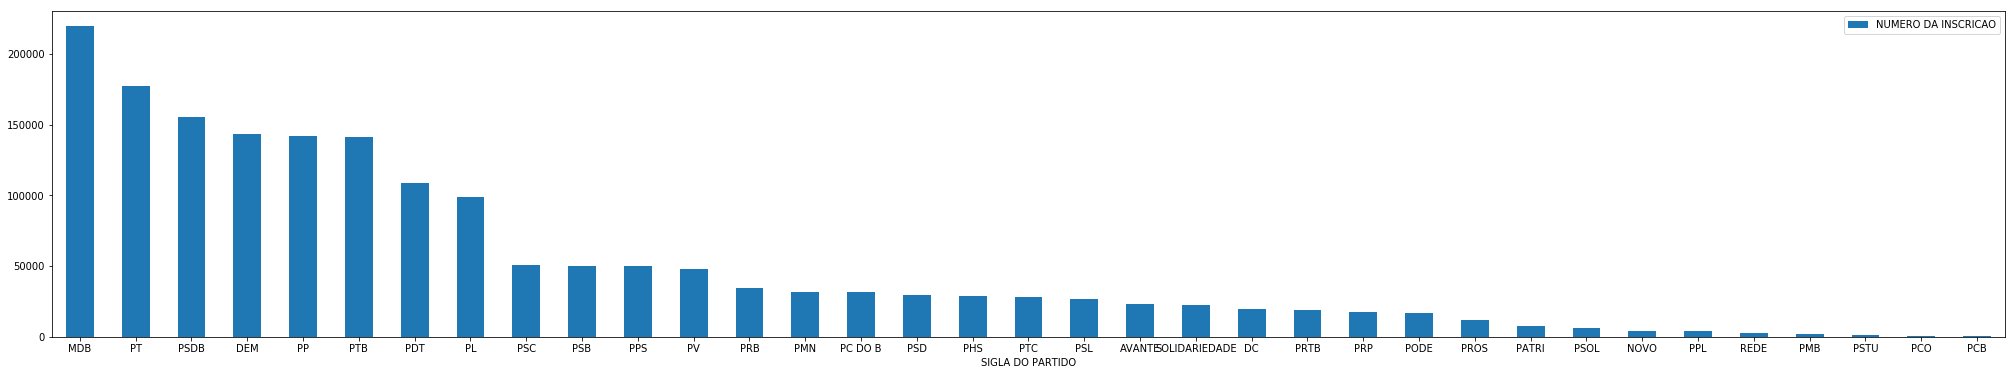

In [0]:
distinct_regulares_mg.sort_values('NUMERO DA INSCRICAO', ascending=False).plot.bar(y='NUMERO DA INSCRICAO', rot=0, figsize=(35,6))

<function matplotlib.pyplot.show>

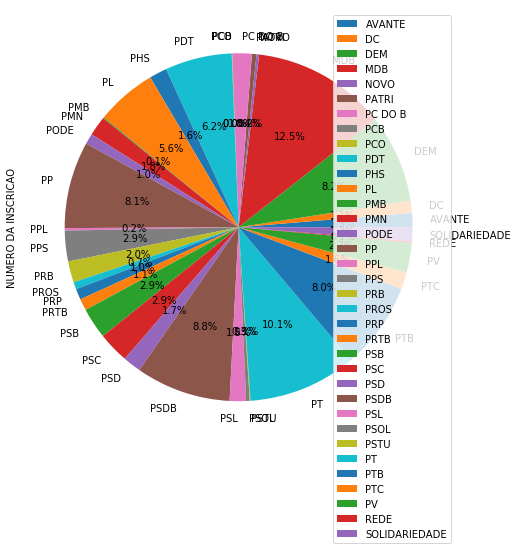

In [59]:
distinct_regulares_mg.plot.pie(y='NUMERO DA INSCRICAO',
                      autopct='%1.1f%%',
                      figsize=(8,8))
plt.show

Experimentando a bibiloteca Plotly

In [0]:
import plotly.express as px
#data_canada = px.data.gapminder().query("country == 'Brazil'")
fig = px.bar(distinct_regulares_mg, y='NUMERO DA INSCRICAO')
fig.show()



#### Vamos manter a ordenação dos registros de maneira decrescente pela quantidade de inscrições regulares

In [0]:
distinct_regulares_mg = distinct_regulares_mg.sort_values('NUMERO DA INSCRICAO', ascending=False)
distinct_regulares_mg

,NUMERO DA INSCRICAO
SIGLA DO PARTIDO,
MDB,219743
PT,177152
PSDB,155351
DEM,143616
PP,141710
PTB,141425
PDT,109085
PL,99150
PSC,50800


#### Quando fizemos o Group by, a sigla do partido passou a ser o indice do dataframe, o que não  e não ajuda com algumas bibliotecas de visualizações, como é o caso da Plotly, portanto, vamos reindexar o dataframe de filiados regulares distintos, inserindo um indice numérico.

In [0]:
distinct_regulares_mg = pd.DataFrame(distinct_regulares_mg.reset_index())
distinct_regulares_mg


,SIGLA DO PARTIDO,NUMERO DA INSCRICAO
0,MDB,219743
1,PT,177152
2,PSDB,155351
3,DEM,143616
4,PP,141710
5,PTB,141425
6,PDT,109085
7,PL,99150
8,PSC,50800
9,PSB,50398


In [0]:
fig = px.bar(distinct_regulares_mg, x='SIGLA DO PARTIDO', y='NUMERO DA INSCRICAO')
fig.show()

Refazer o layout da visualização

In [0]:
fig.update_layout(
    title=px.Title(
        text="Qtd. de filiados por partido",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Partido",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Qtd. de filiados",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)

fig.show()

AttributeError: ignored

## Alguns testes com Pandas

Imprime a lista de arquivos, nome e IDs

In [0]:
for arquivo in arquivos:
  print('title: %s, id: %s' % (arquivo['title'], arquivo['id']))
  #downloaded = drive.CreateFile({'id':id})  

In [0]:
#Apenas o link do PSOL MG
link = 'https://drive.google.com/open?id=1XNSUwBfuIM5A_ar2DtSVMI3Gs4dAARRU'

In [0]:
fluff, id = link.split('=')

In [0]:
print (id)

1XNSUwBfuIM5A_ar2DtSVMI3Gs4dAARRU


In [0]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('filiados_psol_mg.csv')

In [0]:
downloaded

GoogleDriveFile({'id': '1XNSUwBfuIM5A_ar2DtSVMI3Gs4dAARRU', 'kind': 'drive#file', 'etag': '"nXtIxdhlFDFIhsGsH38h1lfMTKg/MTU3MDQ5MTU2ODE0Mw"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1XNSUwBfuIM5A_ar2DtSVMI3Gs4dAARRU', 'webContentLink': 'https://drive.google.com/uc?id=1XNSUwBfuIM5A_ar2DtSVMI3Gs4dAARRU&export=download', 'alternateLink': 'https://drive.google.com/file/d/1XNSUwBfuIM5A_ar2DtSVMI3Gs4dAARRU/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1XNSUwBfuIM5A_ar2DtSVMI3Gs4dAARRU/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'filiados_psol_mg.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2019-09-29T02:59:12.578Z', 'modifiedDate': '2019-10-07T23:39:28.143Z', 'modifiedByMeDate': '2019-10-07T23:39:28.143Z', 'lastViewedByMeDate': '2019-10-07T23:39:19.370

In [0]:
fil_psol_mg = pd.read_csv('filiados_psol_mg.csv', sep=';', encoding='latin-1')

In [0]:
fil_psol_mg.head(100)

Array de partidos

In [0]:
partidos = ["avante",
            "dc",
            "dem",
            "mdb",
            "novo",
            "patri",
            "pc_do_b",
            "pcb",
            "pco",
            "pdt",
            "phs",
            "pl",
            "pmb",
            "pmn",
            "pode",
            "pp",
            "ppl",
            "pps",
            "prb",
            "pros",
            "prp",
            "prtb",
            "psb",
            "psc",
            "psd",
            "psdb",
            "psl",
            "psol",
            "pstu",
            "pt",
            "ptb",
            "ptc",
            "pv",
            "rede",
            "solidariedade"]